#### Customizing Seaborn Plots
###### All Plots: Use the seaborn them API sns.set_style() either darkgrid or whitegrid
##### You can also  use the sns.set_them()
#### These are easy to use, Useful for high level  adjustments to the site

###### Axis Levels Plots: matplotlib axes-level plots: fig,ax1=plt.subplots()
###### We can also use the sns.histplot(ax=ax1),
                           sns.set_xlabel()
                           sns.set_ylabel()
                           #### Powerful customizations
                           #### Only available for axes level plots

#####   Figure Levels Plots: FaceGrid Methods like
              #### g = sns.displot()
              #### g.set()
              #### g.set_axis_label()
              #### g.set_titles()
              #### g.savefig()
              #### g.refline()
######
  1) Figure levels are streamlined APIs
   2) Limited Customizations options for Figure level plots





In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
src_file = Path.cwd() / 'data' / 'raw' / 'fuel_summary.csv'
df = pd.read_csv(src_file)

In [3]:
df.head()

,make,model,year,transmission,drive,date_range,fuel_type_summary,class_summary,cylinders,displ,co2,barrels08,fuelCost08,highway08,city08,comb08
0,Acura,NSX,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,3.0,-1,18.311667,2600,22,15,18
1,Acura,NSX,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,18.311667,2600,22,15,18
2,BMW,M Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,17.347895,2500,23,17,19
3,BMW,Z3 Coupe,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,2.8,-1,17.347895,2500,24,17,19
4,BMW,Z3 Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,2.8,-1,17.347895,2500,24,17,19


In [4]:
sns.set_style('whitegrid')

In [5]:
fuel_class = pd.crosstab(df['class_summary'], df['fuel_type_summary'], values=df['comb08'], aggfunc='mean')

fuel_class

fuel_type_summary,Diesel,Electric,Gas,Other
class_summary,,,,
Car,32.891156,106.530864,22.502994,24.500000
Other,22.000000,62.000000,16.970615,12.333333
Pickup,23.133333,57.333333,17.002950,11.888889
SUV,24.216495,84.632653,19.435003,NaN
Wagon,32.818182,111.000000,23.422427,NaN


<AxesSubplot:xlabel='fuel_type_summary', ylabel='class_summary'>

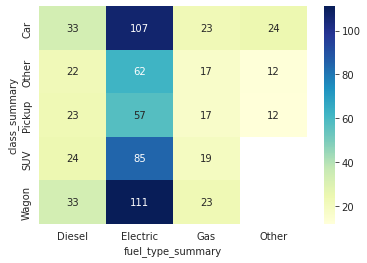

In [6]:
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap='YlGnBu')

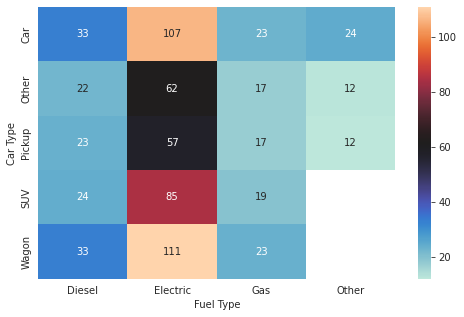

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap='icefire', ax=ax)
ax.set_ylabel('Car Type')
ax.set_xlabel('Fuel Type')
fig.savefig('images/seaborn_heatmap.svg')



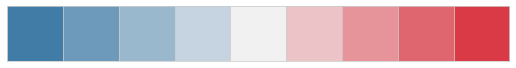

In [8]:
sns.palplot(sns.diverging_palette(240, 10, n=9))

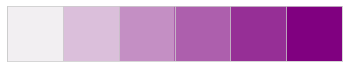

In [9]:
sns.palplot(sns.light_palette('purple'))

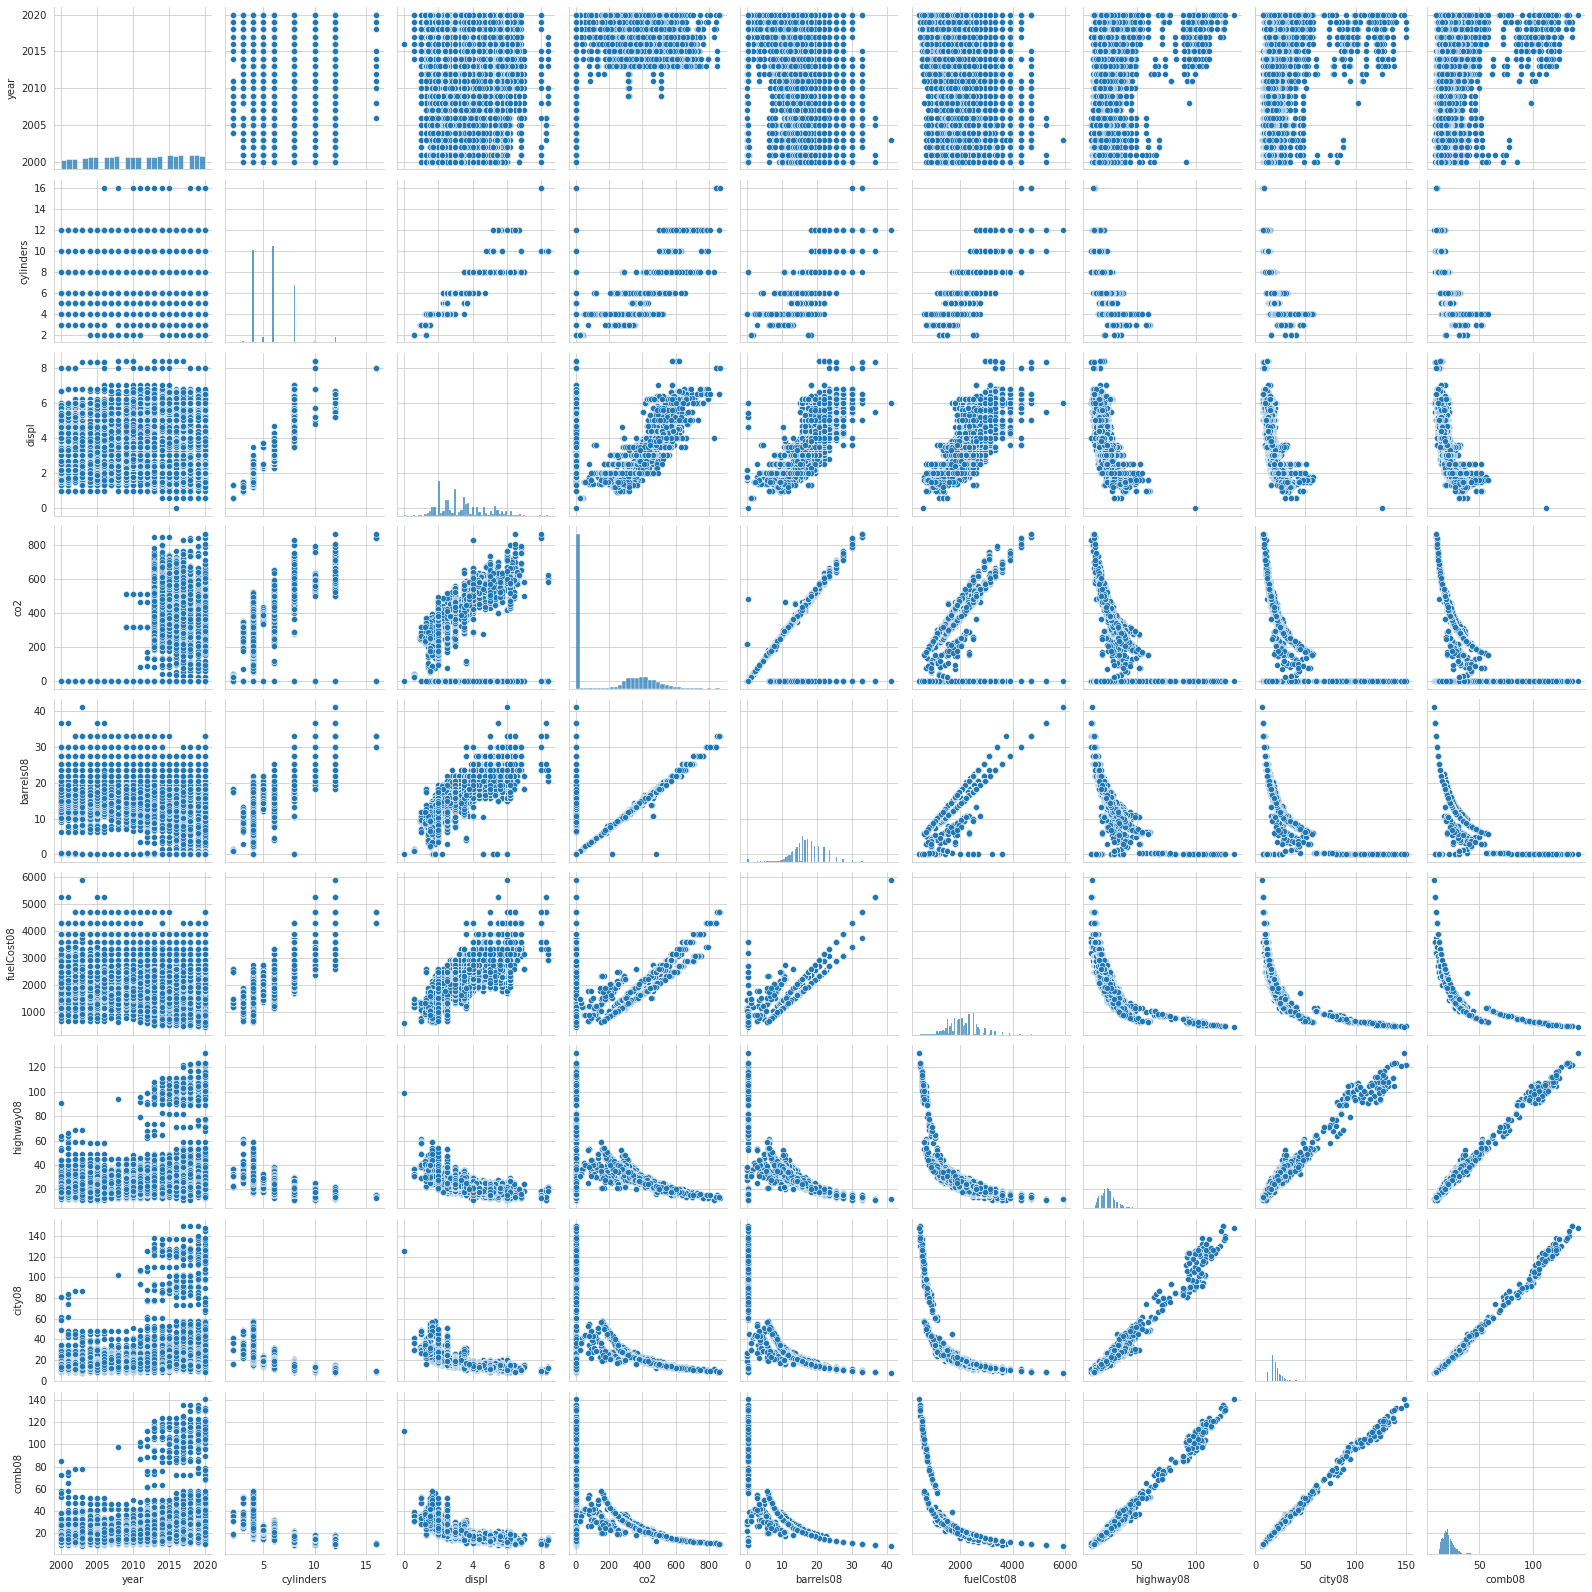

In [10]:
sns.pairplot(df)

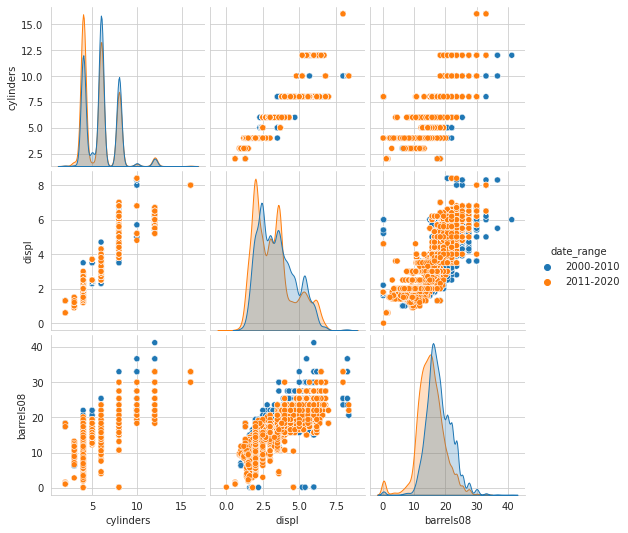

In [11]:
sns.pairplot(df, x_vars=['cylinders', 'displ', 'barrels08'],
             y_vars=['cylinders', 'displ', 'barrels08'],hue='date_range')

# This graph is computationally very expensive to run as it takes time---in minutes to be completed

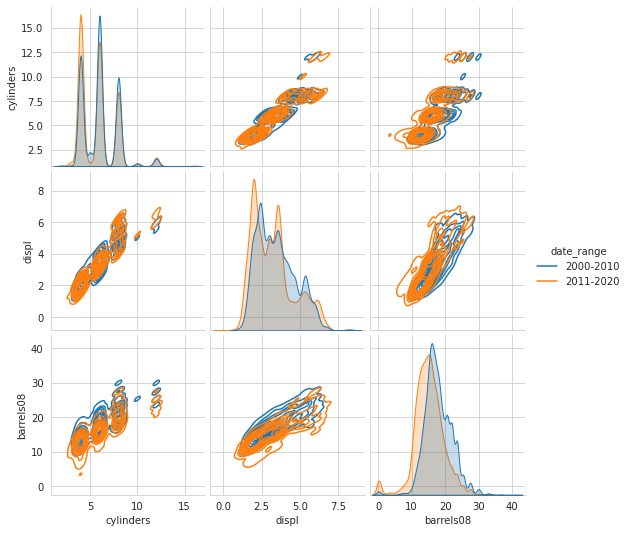

In [12]:
sns.pairplot(df, x_vars=['cylinders', 'displ', 'barrels08'],
             y_vars=['cylinders', 'displ', 'barrels08'],kind='kde',hue='drive')

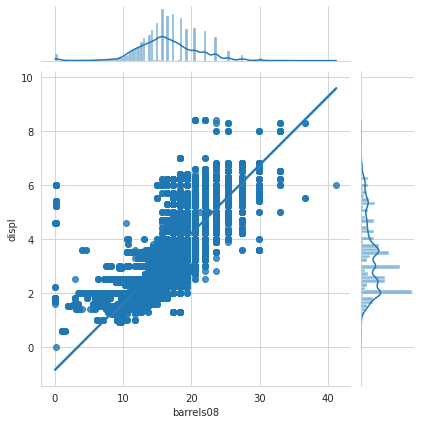

In [13]:
sns.jointplot(data=df,x="barrels08",y="displ",kind="reg")

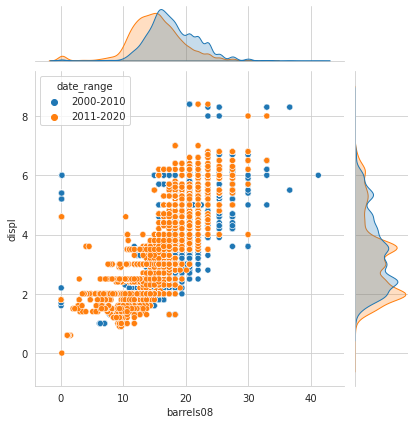

In [14]:
sns.jointplot(data=df,x="barrels08",y="displ",hue="date_range")

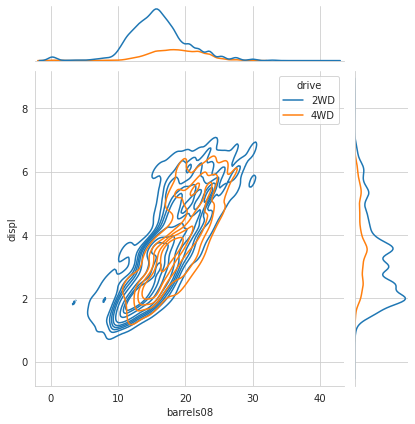

In [15]:
sns.jointplot(data=df,x="barrels08",y="displ",hue="drive",kind="kde")